In [7]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('ggplot')
plt.rc('figure', figsize=(15, 6))

$$z = F(0) = (F(y) + F'(y)(-y) + \dots )\bigg|_{y = f(x)}= x - \frac{1}{p} x^{1-p} (x^p-a) + \frac{1}{2} \frac{1}{p} (\frac{1}{p} - 1)x^{1-2p} (x^p-a)^2 - \frac{1}{6} \frac{1}{p} (\frac{1}{p} - 1)(\frac{1}{p} - 2)x^{1-3p} (x^p-a)^3$$
$$e_{n+1} \leq c e_{n}^{k}$$

In [9]:
def chebyshev(
    a, p, x0, 
    root, order, 
    tolerance=1e-6, max_iter=100
) -> (float, int, list):

    x = x0
    x_diffs = []
    for i in range(max_iter):

        if order == 2:
            try: 
                x_new = x - 1 / p * x ** (1 - p) * (x ** p - a)
            except:
                raise ValueError("Err")
        if order == 3:
            try:
                x_new = x - 1 / p * x ** (1 - p) * (x ** p - a) + 1 / 2 * 1 / p * (1 / p - 1) * x ** (1 - 2 * p) * (x ** p - a) ** 2
            except:
                raise ValueError("Err")
        if order == 4:
            try:
                x_new = x - 1 / p * x ** (1 - p) * (x ** p - a) + 1/ 2 * 1 / p * (1 / p - 1) * x ** (1 - 2 * p) * (x ** p - a) ** 2 - \
            1/ 6 * 1 / p * (1 / p - 1) * (1 / p - 2) * x ** (1 - 3 * p) * (x ** p - a) ** 3
            except:
                raise ValueError("Err") 
        
        x_diffs.append(abs(root -  x_new))
        
        if abs(x_new - x) < tolerance:
            return x_new, i + 1, x_diffs
        x = x_new

    raise ValueError("Not converge.")

In [23]:
p = 2
a = 16
x0 = 3
ans = 4
order = 2

ans, num_iter, diffs = chebyshev(
    a = a, p = p,
    x0 = x0,
    root = ans,
    order = order
)
print(f"Iter = {num_iter}-th step.") 
print(f"ans = {ans}")

Iter = 5-th step.
ans = 4.0


$$e_{n+1} \leq c e_{n}^{k}$$
$$ln\left(e_{n+1}\right) \leq k \cdot ln\left(e_{n}\right) + ln(c) $$

[ -5.70378247 -13.48783948 -29.05524021         -inf]


/var/folders/rz/q38y2crj2378lqt648zw0cbr0000gn/T/ipykernel_21311/946608040.py:2: RuntimeWarning: divide by zero encountered in log
  ln_e_n_1 = np.log(np.array(diffs[1:]))


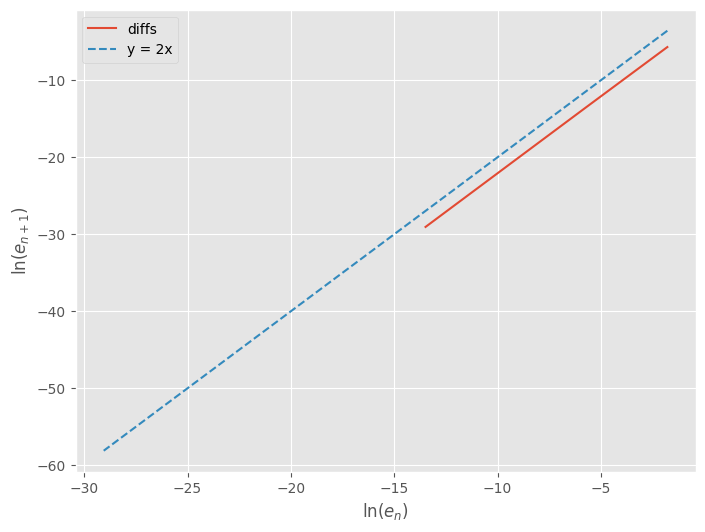

In [24]:
ln_e_n = np.log(np.array(diffs[:-1]))
ln_e_n_1 = np.log(np.array(diffs[1:]))

plt.figure(figsize=(8, 6))

plt.plot(ln_e_n, ln_e_n_1, label='diffs')
print(ln_e_n_1)

plt.plot(ln_e_n, order * ln_e_n,  "--", label=f'y = {order}x')


plt.xlabel(r"$\ln(e_n)$")
plt.ylabel(r"$\ln(e_{n+1})$")

plt.legend()

plt.show()